# Mini Project D7041E , Group 31

## Jacob Möller,  jacmll-9@student.ltu.se
## Emil Wiklund, emiwik-9@student.ltu.se

### Introduction

This mini project were done to futher improve our skills in and understanding of using MLP (multi-layer-percepton neural network) for supervised learning. The project utalizes the familiar dataset MNIST.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [4]:
#loadning image data from MNIST of handwritten digits.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False)

In [5]:
def visualize_samples(images, labels, predicted_labels):
    num_samples = len(images)
    num_rows = int(np.ceil(num_samples / 5))
    fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2 * num_rows))
    axes = axes.flatten()

    for i in range(num_samples):
        image = images[i].squeeze().cpu().numpy()
        label = labels[i].item()
        predicted_label = predicted_labels[i].item()

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"True: {label}\nPred: {predicted_label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

## Training phase

In [6]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


## Testing phase

In [7]:
def test_model(model):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

## The model

In [8]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        

    def forward(self, x):
        x = x.view(x.size(0), -1) #flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)    
        x = F.softmax(x, dim = 1)
        return x

## Main

In [10]:
torch.manual_seed(42)

# Define parameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.001
#num_epochs = 100
num_epochs = 10

# Initialize model, loss function, and optimizer
model = MLPModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, criterion, optimizer, num_epochs)

# Test the model
accuracy = test_model(model)
print(f"Accuracy on the test set: {accuracy}")

#print("Visualize")
#visualize_samples(model)

Accuracy on the test set: 0.9646


Confusion Matrix:
[[ 974    0    0    1    0    2    0    1    2    0]
 [   0 1120    4    2    0    2    1    2    4    0]
 [   6    2  989   18    2    2    5    5    3    0]
 [   1    0    3  983    0    9    0    9    5    0]
 [   4    0    4    0  942    2    7    4    3   16]
 [   7    0    1   13    0  859    4    2    5    1]
 [   9    3    3    1    1   12  923    2    4    0]
 [   2    6   17    6    0    2    0  991    0    4]
 [   4    0    3   15    4    6    4    5  932    1]
 [   6    6    2   16   18   16    1    7    4  933]]


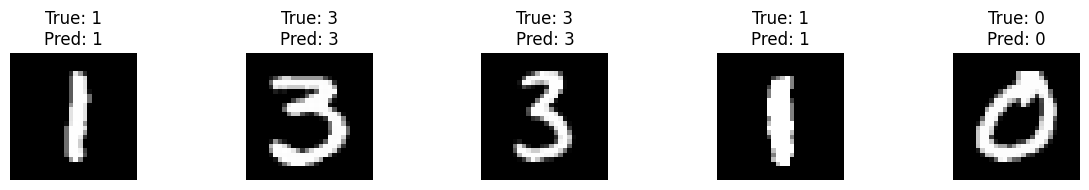

Accuracy on the test set: 0.9646


In [11]:

# Function to visualize data samples
def visualize_samples(images, labels, predicted_labels):
    num_samples = len(images)
    num_rows = int(np.ceil(num_samples / 5))
    fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2 * num_rows))
    axes = axes.flatten()

    for i in range(num_samples):
        image = images[i].squeeze().cpu().numpy()
        label = labels[i].item()
        predicted_label = predicted_labels[i].item()

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"True: {label}\nPred: {predicted_label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Function to test the model with data visualization
def test_model_visualize(model):
    model.eval()
    all_predictions = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())
            all_images.extend(images)

    accuracy = accuracy_score(all_labels, all_predictions)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualize random data samples
    random_indices = np.random.choice(len(all_images), size=5, replace=False)
    visualize_samples([all_images[i] for i in random_indices], 
                      [all_labels[i] for i in random_indices],
                      [all_predictions[i] for i in random_indices])

    return accuracy


# Test the model with visualization
accuracy = test_model_visualize(model)
print(f"Accuracy on the test set: {accuracy}")